In [43]:
import pandas as pd
import numpy as np

In [2]:
train_x = pd.read_csv("E:\\2ndMSIT\\Intro to ML\\DataScience_2019501037\\Kaggle_titanic_log_reg\\train.csv",index_col = 0)
train_x

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test_x = pd.read_csv("E:\\2ndMSIT\\Intro to ML\\DataScience_2019501037\\Kaggle_titanic_log_reg\\test.csv",index_col = 0)
test_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [5]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


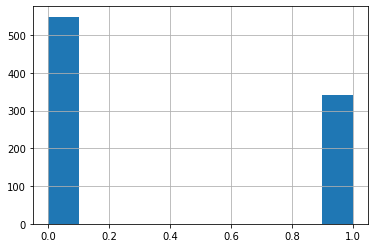

In [6]:
train_y = train_x['Survived']
train_y.hist()
train_x.drop('Survived',axis=1,inplace=True)
train_x

In [7]:
train_x.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [9]:
sample_size = len(train_x)
sample_size

891

In [10]:
sample_size = len(test_x)
sample_size

418

In [11]:
train_col_with_nullvalues=[[col,float(train_x[col].isnull().sum())/float(sample_size)] for col in train_x.columns if train_x[col].isnull().sum()]
train_col_with_nullvalues


[['Age', 0.423444976076555],
 ['Cabin', 1.6435406698564594],
 ['Embarked', 0.004784688995215311]]

In [12]:
test_col_with_nullvalues=[[col,float(test_x[col].isnull().sum())/float(sample_size)] for col in test_x.columns if test_x[col].isnull().sum()]
test_col_with_nullvalues

[['Age', 0.20574162679425836],
 ['Fare', 0.0023923444976076554],
 ['Cabin', 0.7822966507177034]]

In [13]:
train_x = train_x.drop(columns =['Name','Ticket','Cabin','Embarked'],axis = 1)
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,male,22.0,1,0,7.2500
2,1,female,38.0,1,0,71.2833
3,3,female,26.0,0,0,7.9250
4,1,female,35.0,1,0,53.1000
5,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000
888,1,female,19.0,0,0,30.0000
889,3,female,NaN,1,2,23.4500


In [14]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 48.7+ KB


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(train_x.iloc[:, 2:3])
train_x.iloc[:, 2:3] = imputer.transform(train_x.iloc[:, 2:3])
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,male,22.000000,1,0,7.2500
2,1,female,38.000000,1,0,71.2833
3,3,female,26.000000,0,0,7.9250
4,1,female,35.000000,1,0,53.1000
5,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
887,2,male,27.000000,0,0,13.0000
888,1,female,19.000000,0,0,30.0000
889,3,female,29.699118,1,2,23.4500


In [16]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 48.7+ KB


In [17]:
train_x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [18]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [19]:
test_x = test_x.drop(columns =['Embarked','Name','Ticket','Cabin'],axis = 1)
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3,male,34.5,0,0,7.8292
893,3,female,47.0,1,0,7.0000
894,2,male,62.0,0,0,9.6875
895,3,male,27.0,0,0,8.6625
896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500
1306,1,female,39.0,0,0,108.9000
1307,3,male,38.5,0,0,7.2500


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(test_x.iloc[:, 2:3])
test_x.iloc[:, 2:3] = imputer.transform(test_x.iloc[:, 2:3])
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3,male,34.50000,0,0,7.8292
893,3,female,47.00000,1,0,7.0000
894,2,male,62.00000,0,0,9.6875
895,3,male,27.00000,0,0,8.6625
896,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...
1305,3,male,30.27259,0,0,8.0500
1306,1,female,39.00000,0,0,108.9000
1307,3,male,38.50000,0,0,7.2500


In [21]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [22]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 22.9+ KB


In [23]:
test_x.fillna(0,inplace=True)

In [24]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [25]:
# label encoding for train data
from sklearn import preprocessing


le1 = preprocessing.LabelEncoder()
train_x['Sex'] = le1.fit_transform(train_x.Sex.values)
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.000000,1,0,7.2500
2,1,0,38.000000,1,0,71.2833
3,3,0,26.000000,0,0,7.9250
4,1,0,35.000000,1,0,53.1000
5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000
888,1,0,19.000000,0,0,30.0000
889,3,0,29.699118,1,2,23.4500


In [26]:
train_x.dtypes

Pclass      int64
Sex         int32
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [27]:
# label encoding for test data
le2 = preprocessing.LabelEncoder()
test_x['Sex'] = le2.fit_transform(test_x.Sex.values)
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3,1,34.50000,0,0,7.8292
893,3,0,47.00000,1,0,7.0000
894,2,1,62.00000,0,0,9.6875
895,3,1,27.00000,0,0,8.6625
896,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,8.0500
1306,1,0,39.00000,0,0,108.9000
1307,3,1,38.50000,0,0,7.2500


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=1/3, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(class_weight="balanced",C=0.00001,max_iter=1000000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1e-05, class_weight='balanced', max_iter=1000000)

In [30]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

print(sqrt(mean_squared_error(y_test, logreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(logreg.score(X_test,y_test)))

0.5714886933258843
R2 Value/Coefficient of Determination: 0.6734006734006734


In [31]:
# from sklearn.preprocessing import OneHotEncoder 
# from sklearn.compose import ColumnTransformer 
   
# # creating one hot encoder object with categorical feature 0 
# # indicating the first column 
# columnTransformer = ColumnTransformer([('encoder', 
#                                         OneHotEncoder(), 
#                                         [1])], 
#                                       remainder='passthrough') 
  
# train_x = np.array(columnTransformer.fit_transform(train_x), dtype = np.str) 
# train_x = pd.DataFrame(train_x)
# train_x


In [32]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 45.2 KB


In [33]:
# columnTransformer = ColumnTransformer([('encoder', 
#                                         OneHotEncoder(), 
#                                         [1])], 
#                                       remainder='passthrough') 
  
# test_x = np.array(columnTransformer.fit_transform(test_x), dtype = np.str) 
# test_x = pd.DataFrame(test_x)
# test_x

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.8215488215488216


In [36]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [37]:

test_x = test_x.astype('float64').astype('float32')
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3.0,1.0,34.500000,0.0,0.0,7.829200
893,3.0,0.0,47.000000,1.0,0.0,7.000000
894,2.0,1.0,62.000000,0.0,0.0,9.687500
895,3.0,1.0,27.000000,0.0,0.0,8.662500
896,3.0,0.0,22.000000,1.0,1.0,12.287500
...,...,...,...,...,...,...
1305,3.0,1.0,30.272591,0.0,0.0,8.050000
1306,1.0,0.0,39.000000,0.0,0.0,108.900002
1307,3.0,1.0,38.500000,0.0,0.0,7.250000


In [38]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    float32
 1   Sex     418 non-null    float32
 2   Age     418 non-null    float32
 3   SibSp   418 non-null    float32
 4   Parch   418 non-null    float32
 5   Fare    418 non-null    float32
dtypes: float32(6)
memory usage: 13.1 KB


In [39]:
pred=pd.DataFrame(classifier.predict(test_x),columns=['Survived'])
pred.index.name = 'PassengerId'
pred.index+=892
pred.to_csv("E:\\2ndMSIT\\Intro to ML\\DataScience_2019501037\\Kaggle_titanic_log_reg\\Final_prediction1.csv")